In [35]:
# Original packages from first ML model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import panel as pn
%matplotlib inline
pn.extension()

In [66]:
# New packages for this ML model
from sklearn.preprocessing import LabelEncoder # I used this one as workaround for map(code) error
#Below c&p'd from dorian voydie's kaggle
import seaborn as sns
from sklearn.decomposition import PCA

# from dataprep.eda import create_report
# from dataprep.eda import plot_missing
# from dataprep.eda import plot_correlation
# from dataprep.eda import plot

from sklearn.model_selection import train_test_split

from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report, roc_curve
from sklearn.model_selection import learning_curve, cross_val_score, GridSearchCV

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler,StandardScaler,MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [36]:
diabetes=pd.read_csv("..\Data\diabetes_NIDDKD.csv")
print(diabetes.columns)

Index(['patient_number', 'cholesterol', 'glucose', 'hdl_chol',
       'chol_hdl_ratio', 'age', 'gender', 'height', 'weight', 'bmi',
       'systolic_bp', 'diastolic_bp', 'waist', 'hip', 'waist_hip_ratio',
       'diabetes'],
      dtype='object')


In [37]:
diabetes.head()

,patient_number,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,gender,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio,diabetes
0,1,193,77,49,"3,9",19,female,61,119,"22,5",118,70,32,38,"0,84",No diabetes
1,2,146,79,41,"3,6",19,female,60,135,"26,4",108,58,33,40,"0,83",No diabetes
2,3,217,75,54,4,20,female,67,187,"29,3",110,72,40,45,"0,89",No diabetes
3,4,226,97,70,"3,2",20,female,64,114,"19,6",122,64,31,39,"0,79",No diabetes
4,5,164,91,67,"2,4",20,female,70,141,"20,2",122,86,32,39,"0,82",No diabetes


### This diabetes dataset consists of 390 data points with 16 features of each

In [38]:
diabetes.shape

(390, 16)

In [40]:
df=diabetes.copy()
pd.set_option('display.max_row',df.shape[0])
pd.set_option('display.max_column',df.shape[1]) 
df.head()

,patient_number,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,gender,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio,diabetes
0,1,193,77,49,"3,9",19,female,61,119,"22,5",118,70,32,38,"0,84",No diabetes
1,2,146,79,41,"3,6",19,female,60,135,"26,4",108,58,33,40,"0,83",No diabetes
2,3,217,75,54,4,20,female,67,187,"29,3",110,72,40,45,"0,89",No diabetes
3,4,226,97,70,"3,2",20,female,64,114,"19,6",122,64,31,39,"0,79",No diabetes
4,5,164,91,67,"2,4",20,female,70,141,"20,2",122,86,32,39,"0,82",No diabetes


In [41]:
# Create the LabelEncoder instance
le = LabelEncoder()

In [42]:
# Encoding gender column
le.fit(df["gender"])
df["gender"] = le.transform(df["gender"])

In [43]:
# Encoding diabetes column
le.fit(df["diabetes"])
df["diabetes"] = le.transform(df["diabetes"])

In [45]:
df.head()

,patient_number,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,gender,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio,diabetes
0,1,193,77,49,"3,9",19,0,61,119,"22,5",118,70,32,38,"0,84",1
1,2,146,79,41,"3,6",19,0,60,135,"26,4",108,58,33,40,"0,83",1
2,3,217,75,54,4,20,0,67,187,"29,3",110,72,40,45,"0,89",1
3,4,226,97,70,"3,2",20,0,64,114,"19,6",122,64,31,39,"0,79",1
4,5,164,91,67,"2,4",20,0,70,141,"20,2",122,86,32,39,"0,82",1


In [46]:
df.dtypes

patient_number      int64
cholesterol         int64
glucose             int64
hdl_chol            int64
chol_hdl_ratio     object
age                 int64
gender              int32
height              int64
weight              int64
bmi                object
systolic_bp         int64
diastolic_bp        int64
waist               int64
hip                 int64
waist_hip_ratio    object
diabetes            int32
dtype: object

In [47]:
# def imputation(df):
#     df = df.dropna(axis=0)
#     return df

In [48]:
def feature_engineering(df):
    useless_columns = ['patient_number']
    df = df.drop(useless_columns, 1)
    return df

In [49]:
df=feature_engineering(df)
df.head()

,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,gender,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio,diabetes
0,193,77,49,"3,9",19,0,61,119,"22,5",118,70,32,38,"0,84",1
1,146,79,41,"3,6",19,0,60,135,"26,4",108,58,33,40,"0,83",1
2,217,75,54,4,20,0,67,187,"29,3",110,72,40,45,"0,89",1
3,226,97,70,"3,2",20,0,64,114,"19,6",122,64,31,39,"0,79",1
4,164,91,67,"2,4",20,0,70,141,"20,2",122,86,32,39,"0,82",1


In [50]:
# def preprocessing(df):
#     df = encoding(df)
#     df = feature_engineering(df)
#     df = imputation(df)
df_copy = df.copy()
X = df.drop('diabetes', 1)
y = df['diabetes']    

#     return df,X,y

In [51]:
# df,_,_ = preprocessing(df)
X.head(10)

,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,gender,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio
0,193,77,49,"3,9",19,0,61,119,"22,5",118,70,32,38,"0,84"
1,146,79,41,"3,6",19,0,60,135,"26,4",108,58,33,40,"0,83"
2,217,75,54,4,20,0,67,187,"29,3",110,72,40,45,"0,89"
3,226,97,70,"3,2",20,0,64,114,"19,6",122,64,31,39,"0,79"
4,164,91,67,"2,4",20,0,70,141,"20,2",122,86,32,39,"0,82"
5,170,69,64,"2,7",20,0,64,161,"27,6",108,70,37,40,"0,93"
6,149,77,49,3,20,0,62,115,21,105,82,31,37,"0,84"
7,164,71,63,"2,6",20,1,72,145,"19,7",108,78,29,36,"0,81"
8,230,112,64,"3,6",20,1,67,159,"24,9",100,90,31,39,"0,79"
9,179,105,60,3,20,0,58,170,"35,5",140,100,34,46,"0,74"


In [52]:
y.head(10)

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: diabetes, dtype: int32

### Outcome 1 means No diabetes, outcome 0 means diabetes

In [54]:
df.groupby('diabetes').size()

diabetes
0     60
1    330
dtype: int64

### So there are 60 people with diabetes out of 390

C:\Users\Ray\anaconda3\envs\mlenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='diabetes', ylabel='count'>

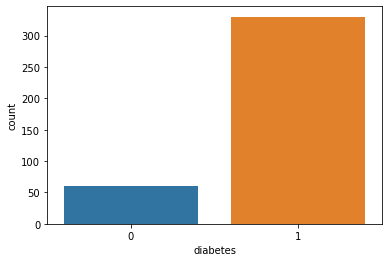

In [55]:
import seaborn as sns

sns.countplot(df['diabetes'], label="Count")

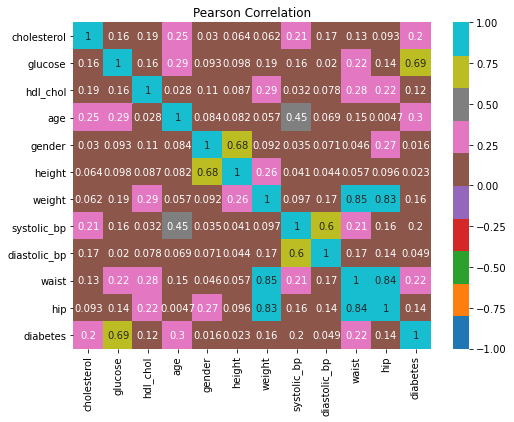

gender          0.015531
height          0.023466
diastolic_bp    0.049351
hdl_chol        0.123133
hip             0.143792
weight          0.162987
systolic_bp     0.198600
cholesterol     0.204262
waist           0.223378
age             0.301995
glucose         0.689080
diabetes        1.000000
Name: diabetes, dtype: float64


In [58]:
# Utilising the Pearson correlation method to find correlation coefficients of features
corr = df.corr(method='pearson').abs()

fig = plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='tab10', vmin=-1, vmax=+1)
plt.title('Pearson Correlation')
plt.show()

print (df.corr()['diabetes'].abs().sort_values())

In [60]:
df['diabetes'].value_counts(normalize=True)

1    0.846154
0    0.153846
Name: diabetes, dtype: float64

In [61]:
# Class count
count_class_0, count_class_1 = df['diabetes'].value_counts()

# Divide by class
df_class_0 = df[df['diabetes'] == 1]
df_class_1 = df[df['diabetes'] == 0]

print(count_class_0)
print(count_class_1)

330
60


Random under-sampling:
0    60
1    60
Name: diabetes, dtype: int64


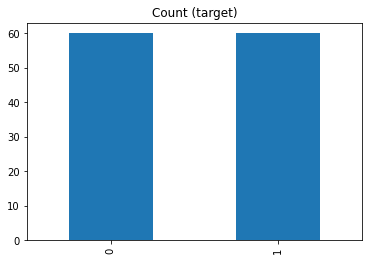

In [62]:
# Trialling Random Undersampling
df_class_0_under = df_class_0.sample(count_class_1,random_state=42)
df_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_under['diabetes'].value_counts())

df_under['diabetes'].value_counts().plot(kind='bar', title='Count (target)');

In [64]:
# Creating the Train and Test set

trainset, testset = train_test_split(df_under, test_size=0.2, random_state=42)
print(trainset['diabetes'].value_counts())
print(testset['diabetes'].value_counts())

NameError: name 'train_test_split' is not defined

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   cholesterol      390 non-null    int64 
 1   glucose          390 non-null    int64 
 2   hdl_chol         390 non-null    int64 
 3   chol_hdl_ratio   390 non-null    object
 4   age              390 non-null    int64 
 5   gender           390 non-null    int32 
 6   height           390 non-null    int64 
 7   weight           390 non-null    int64 
 8   bmi              390 non-null    object
 9   systolic_bp      390 non-null    int64 
 10  diastolic_bp     390 non-null    int64 
 11  waist            390 non-null    int64 
 12  hip              390 non-null    int64 
 13  waist_hip_ratio  390 non-null    object
 14  diabetes         390 non-null    int32 
dtypes: int32(2), int64(10), object(3)
memory usage: 42.8+ KB


## **Trying a few different ML models**

### **k-Nearest Neighbours**

#### The k-NN algorithm is arguably the simplest machine learning algorithm. Building the model consists only of storing the training dataset. To make a prediction for a new data point, the algorithm finds the closest data points in the training dataset—its “nearest neighbors.”

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    diabetes.loc[:,diabetes.columns != 'Outcome'],
    diabetes['Outcome'], 
    stratify=diabetes['Outcome'], 
    random_state=66
    )

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(6, 15)

for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(knn.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
# plt.savefig('..\Outputs\knn_compare_model')

#### The plot shows the training and test set accuracy on the y-axis against the setting of n_neighbors on the x-axis. Considering if we choose one single nearest neighbor, the prediction on the training set is perfect. But when more neighbors are considered, the training accuracy drops, indicating that using the single nearest neighbor leads to a model that is too complex. The best performance is somewhere around 13 neighbors.

#### The above plot suggests that we should choose n_neighbors=13. Here we are:

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

### **Logistic Regression**

#### Logistic regression is one of the most common classification algorithms.

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression().fit(X_train, y_train)
print("Training set accuracy: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(logreg.score(X_test, y_test)))

In [ ]:
# by_feature_fn(preg,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age)

#### The default value of C=1 provides with 78% accuracy on training and 77% accuracy on test set.

In [ ]:
# logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
# print("Training set accuracy: {:.3f}".format(logreg001.score(X_train, y_train)))
# print("Test set accuracy: {:.3f}".format(logreg001.score(X_test, y_test)))

#### C=0.01 -->  Training set accuracy: 0.762_____Test set accuracy: 0.760

In [59]:
# logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
# print("Training set accuracy: {:.3f}".format(logreg001.score(X_train, y_train)))
# print("Test set accuracy: {:.3f}".format(logreg001.score(X_test, y_test)))

In [ ]:
# logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
# print("Training set accuracy: {:.3f}".format(logreg100.score(X_train, y_train)))
# print("Test set accuracy: {:.3f}".format(logreg100.score(X_test, y_test)))

#### C=100 --> Training set accuracy: 0.783_____Test set accuracy: 0.781

#### Using C=100 results in a little bit higher accuracy on training set little bit lower accuracy on test set, confirming that less regularization and a more complex model may not generalize better than default setting.

#### Therefore, we should choose default value C=1.

#### Finally, let’s look at the coefficients learned by the models with the three different settings of the regularization parameter C.

#### Stronger regularization (C=0.001) pushes coefficients more and more toward zero. Inspecting the plot more closely, we can also see that feature “DiabetesPedigreeFunction”, for C=100, C=1 and C=0.001, the coefficient is positive. This indicates that high “DiabetesPedigreeFunction” feature is related to a sample being “diabetes”, regardless which model we look at.


In [ ]:
diabetes_features = [x for i,x in enumerate(diabetes.columns) if i!=9]

plt.figure(figsize=(8,6))
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(diabetes.shape[1]), diabetes_features, rotation=90)
plt.hlines(0, 0, diabetes.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()
plt.savefig('..\Outputs\log_coef')

## **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

#### Trialling max_depth=3

In [ ]:
tree = DecisionTreeClassifier(max_depth=5, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

#### **Feature importance**

In [ ]:
print("Feature importances:\n{}".format(tree.feature_importances_))

In [ ]:
# Visualising the feature importances
def plot_feature_importances_diabetes(model):
    plt.figure(figsize=(8,6))
    n_features = 8
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), diabetes_features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_diabetes(tree)

# # plt.savefig('..\Outputs\feature_importance')


# def plot_feature_importances_diabetes_2(model):
#     n_features = 8
#     plt.barh(range(n_features), model.feature_importances_, align='center')
#     plt.yticks(np.arange(n_features), diabetes_features)
#     plt.xlabel("Feature importance")
#     plt.ylabel("Feature") 
#     plt.title("Feature importance for predicting Diabetes")
#     plt.ylim(-1, n_features)

# plot_feature_importances_diabetes(tree)
    
#     plt.show()



In [ ]:
# X_train.head()

### Glucose is the most important feature

## **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))

### The random forest gives us an accuracy of 78.6%, better than the logistic regression model or a single decision tree, without tuning any parameters. However, we can adjust the max_depth setting, to see whether the result can be improved

In [ ]:
rf1 = RandomForestClassifier(max_depth=3, n_estimators=100, random_state=0)
rf1.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf1.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf1.score(X_test, y_test)))

### It did not, this indicates that the default parameters of the random forest work well.

## **Feature importance in Random Forest**


In [ ]:
plot_feature_importances_diabetes(rf)

### Similarly to the single decision tree, the random forest also gives a lot of importance to the “Glucose” feature, but it also chooses “BMI” to be the 2nd most informative feature overall. The randomness in building the random forest forces the algorithm to consider many possible explanations, the result being that the random forest captures a much broader picture of the data than a single tree.

### **Gradient Boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=0)
gb.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gb.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gb.score(X_test, y_test)))

### We are likely to be overfitting. To reduce overfitting, we could either apply stronger pre-pruning by limiting the maximum depth or lower the learning rate:

In [ ]:
gb1 = GradientBoostingClassifier(random_state=0, max_depth=1)
gb1.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gb1.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gb1.score(X_test, y_test)))

In [ ]:
gb2 = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gb2.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gb2.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gb2.score(X_test, y_test)))

### Both methods of decreasing the model complexity reduced the training set accuracy, as expected. In this case, none of these methods increased the generalization performance of the test set.

### We can visualize the feature importances to get more insight into our model even though we are not really happy with the model.


In [ ]:
plot_feature_importances_diabetes(gb1)

### We can see that the feature importances of the gradient boosted trees are somewhat similar to the feature importances of the random forests, it gives weight to all of the features in this case.

### **Support Vector Machine** 

In [ ]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

### The model overfits quite substantially, with a perfect score on the training set and only 65% accuracy on the test set.

### SVM requires all the features to vary on a similar scale. We will need to rescale our data that all the features are approximately on the same scale:


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

svc = SVC()
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test_scaled, y_test)))

### Scaling the data made a huge difference! Now we are actually in an underfitting regime, where training and test set performance are quite similar but less close to 100% accuracy. From here, we can try increasing either C or gamma to fit a more complex model.

In [ ]:
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

### Here, increasing C allows us to improve the model, resulting in 79.7% test set accuracy.

### **Neural Networks**

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

### The accuracy of the MLP is not as good as the other models at all, this is likely due to scaling of the data. Neural networks also expect all input features to vary in a similar way, and ideally to have a mean of 0, and a variance of 1. We must rescale our data so that it fulfills these requirements.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

In [ ]:
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

In [ ]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

In [ ]:
plt.figure(figsize=(20,10))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(8), diabetes_features)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()

### From the heat map, it is not easy to point out quickly that which feature (features) have relatively low weights compared to the other features.

## **Summary**

### We practiced a wide array of machine learning models for classification and regression, what their advantages and disadvantages are, and how to control model complexity for each of them. We saw that for many of the algorithms, setting the right parameters is important for good performance.

### We should be able to know how to apply, tune, and analyze the models we practiced above.
